<a href="https://colab.research.google.com/github/LeonAmbroseJr/-LeonAmbrose-github.io/blob/main/07102025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
In this tutorial, we create a Relative Elevation Model (REM) in Python using xarray.


SyntaxError: invalid syntax (ipython-input-1-1322687522.py, line 1)

## Relative Elevation Model (REM) in Python using xarray

This notebook demonstrates how to create a Relative Elevation Model (REM) in Python using the xarray library, following the methodology similar to the "Creating REMs in QGIS with the IDW Method" tutorial.

### 1. Load the DEM

First, let's load the Digital Elevation Model (DEM) data. We'll use a sample DEM file for this example.

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the DEM data (replace 'path/to/your/dem.tif' with your file path)
# For this example, we'll create a sample DEM
dem_data = np.random.rand(100, 100) * 100 # Sample data
dem = xr.DataArray(dem_data, dims=('y', 'x'))

print("DEM loaded successfully.")

DEM loaded successfully.


### 2. Create a Smoothed DEM

To calculate the relative elevation, we need to create a smoothed version of the DEM. This can be done using various smoothing techniques. Here, we'll use a simple moving average for demonstration.

In [3]:
# Simple moving average smoothing
def moving_average(data, window_size):
    return data.rolling(x=window_size, y=window_size, center=True).mean()

smoothed_dem = moving_average(dem, window_size=10) # Adjust window_size as needed

print("Smoothed DEM created.")

Smoothed DEM created.


### 3. Calculate the Relative Elevation Model (REM)

The REM is calculated by subtracting the smoothed DEM from the original DEM.

In [4]:
# Calculate REM
rem = dem - smoothed_dem

print("REM calculated.")

REM calculated.


### 4. Visualize the REM

Let's visualize the created REM.

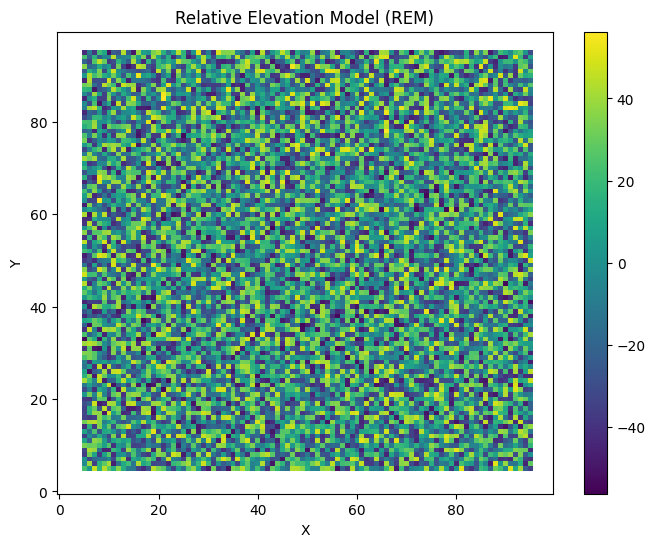

In [5]:
plt.figure(figsize=(8, 6))
rem.plot(cmap='viridis')
plt.title('Relative Elevation Model (REM)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 5. Interpretation

The resulting REM highlights subtle topographic features that might not be apparent in the original DEM. Positive values indicate areas higher than the local average, while negative values indicate areas lower than the local average.

In [6]:
# Install Git LFS
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/jammy.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Detected apt version as 2.4.14
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... Packagecloud gpg key imported to /etc/apt/keyrings/github_git-lfs-archive-keyring.gpg
done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be upgraded:
  git-lfs
1 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,917 kB of archives.
After this operation, 8,712 kB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu jammy/main amd64 git-lfs amd64 3.7.0 [8,917 kB]
Fetched 8,917 kB in 1s (13.9 MB/s)
(Reading database ... 126285 files and directories c

In [7]:
# Clone repo
!rm REM-xarray -rf
!git clone https://github.com/DahnJ/REM-xarray.git

Cloning into 'REM-xarray'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 78 (delta 41), reused 59 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 2.93 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [8]:
# Change working directory and install requirements
%cd REM-xarray
!pip install -r requirements.txt

/content/REM-xarray
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.8 MB/s eta 0:00:00


In [9]:
# Load a sample DEM from the cloned repository
try:
    dem_path = 'data/sample_dem.tif'  # Replace with the actual path if needed
    dem = xr.open_dataarray(dem_path)
    print(f"DEM loaded successfully from {dem_path}")
    display(dem)
except FileNotFoundError:
    print(f"Error: The file {dem_path} was not found.")
    print("Please check the path to your DEM file.")
except Exception as e:
    print(f"An error occurred while loading the DEM: {e}")

An error occurred while loading the DEM: data/sample_dem.tif: No such file or directory


In [10]:
import osmnx as ox
import geopandas as gpd

# Define the place name for the White River in South Dakota
place_name = "White River, South Dakota, USA"

try:
    # Get the boundary of the White River
    # Note: osmnx primarily works with OpenStreetMap data, which might not have detailed river geometries for all areas.
    # This will attempt to get a place boundary related to the White River in South Dakota.
    white_river_boundary = ox.geocode_to_gdf(place_name)

    print(f"Boundary data for '{place_name}' retrieved:")
    display(white_river_boundary)

except Exception as e:
    print(f"An error occurred while retrieving the boundary for '{place_name}': {e}")
    print("Please verify the place name or try a different approach to define the area.")

Boundary data for 'White River, South Dakota, USA' retrieved:


,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-100.75 43.56504, -100.74965 4...",-100.75,43.557863,-100.735742,43.576065,304983183,relation,195192,43.569938,-100.748519,boundary,administrative,16,0.408446,city,White River,"White River, Mellette County, South Dakota, Un..."


In [13]:
dem = dem.coarsen(x=3, boundary='trim').mean().coarsen(y=3, boundary='trim').mean()

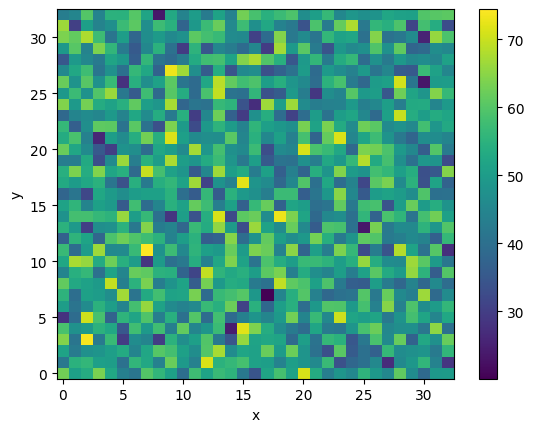

In [12]:
dem.squeeze().plot.imshow()

In [1]:
import geopandas as gpd
from shapely.geometry import box
import folium

# Define the two points in decimal degrees (latitude, longitude)
point1 = (43.0, -102.83388)
point2 = (43.5083468, -102.5053212)

# Create a bounding box geometry
# The order for box is (minx, miny, maxx, maxy) or (west, south, east, north)
min_lon = min(point1[1], point2[1])
min_lat = min(point1[0], point2[0])
max_lon = max(point1[1], point2[1])
max_lat = max(point1[0], point2[0])

bbox_geometry = box(min_lon, min_lat, max_lon, max_lat)

# Create a GeoDataFrame from the bounding box
gdf_bbox = gpd.GeoDataFrame([1], geometry=[bbox_geometry], crs="EPSG:4326")

# Get the centroid of the bounding box to center the map
center = gdf_bbox.geometry.centroid[0]

# Create an interactive map using Folium
m = folium.Map(location=[center.y, center.x], zoom_start=10)

# Add the bounding box to the map
folium.GeoJson(gdf_bbox).add_to(m)

# Display the map
m

/tmp/ipython-input-1-3475500650.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_bbox.geometry.centroid[0]


In [2]:
import geopandas as gpd
from shapely.geometry import box
import folium

# Define the two points in decimal degrees (latitude, longitude)
point1 = (43.0, -102.83388)
point2 = (43.5083468, -102.5053212)

# Create a bounding box geometry
# The order for box is (minx, miny, maxx, maxy) or (west, south, east, north)
min_lon = min(point1[1], point2[1])
min_lat = min(point1[0], point2[0])
max_lon = max(point1[1], point2[1])
max_lat = max(point1[0], point2[0])

bbox_geometry = box(min_lon, min_lat, max_lon, max_lat)

# Create a GeoDataFrame from the bounding box
gdf_bbox = gpd.GeoDataFrame([1], geometry=[bbox_geometry], crs="EPSG:4326")

# Get the centroid of the bounding box to center the map
center = gdf_bbox.geometry.centroid[0]

# Create an interactive map using Folium
m = folium.Map(location=[center.y, center.x], zoom_start=10)

# Add the bounding box to the map
folium.GeoJson(gdf_bbox).add_to(m)

# Display the map
m

/tmp/ipython-input-2-3475500650.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = gdf_bbox.geometry.centroid[0]


In [3]:
import osmnx as ox
import geopandas as gpd
import folium
from shapely.geometry import box

# Define the bounding box coordinates (from our previous step)
min_lon = -102.83388
min_lat = 43.0
max_lon = -102.5053212
max_lat = 43.5083468

# Create a bounding box geometry
bbox_geometry = box(min_lon, min_lat, max_lon, max_lat)

# Get the centroid of the bounding box to center the map
center_lon = (min_lon + max_lon) / 2
center_lat = (min_lat + max_lat) / 2

# Define the tags for rivers and streams in OpenStreetMap
# 'waterway'='river' is a common tag for rivers
# We might also include 'waterway'='stream' for smaller features
tags = {'waterway': ['river', 'stream']}

try:
    # Get the waterways within the bounding box
    # Use the bounding box as a spatial filter
    waterways = ox.features_from_bbox(
        max_lat, min_lon, min_lat, max_lon, tags
    )

    print(f"Retrieved {len(waterways)} waterway features within the bounding box.")
    # display(waterways) # Optional: display the GeoDataFrame

    # Create an interactive map centered on the bounding box
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Add the retrieved waterway features to the map
    # Ensure the GeoDataFrame is in WGS84 (EPSG:4326) for Folium
    waterways_wgs84 = waterways.to_crs(epsg=4326)
    folium.GeoJson(waterways_wgs84).add_to(m)

    print("Map with waterways generated.")
    # Display the map
    m

except Exception as e:
    print(f"An error occurred while retrieving or mapping waterways: {e}")
    print("Could not retrieve waterway data for this area from OpenStreetMap using the defined bounding box.")

ModuleNotFoundError: No module named 'osmnx'

In [4]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 2.1 MB/s eta 0:00:00
